In [61]:
import matplotlib.pyplot as plt
from scipy.ndimage.measurements import label
import scipy.ndimage as nd
import numpy as np
import neuroglancer
import dxchange
import os
import tifffile

%matplotlib notebook

In [62]:
path = '/media/Trantor2/data_raf/2018_04_03_WholeBrainMRI1_retake_newfocus/recon_flatcorr_1x/'

os.chdir(path)
data_raw = 'recon_crop8_new_8x.tif'

data = dxchange.read_tiff(data_raw)
print(data.shape)

voxel_size = 8*1200





(1663, 744, 1144)


In [63]:
anno = data
mask = anno > anno.mean()
mask = mask.astype(np.uint8)


In [64]:
mask_labels, num_features = label(mask)


In [65]:
mask2 = mask_labels==1
mask2 = nd.binary_erosion(mask2,structure=np.ones((3,3,3)))
mask2 = nd.binary_erosion(mask2,structure=np.ones((3,3,3)))

mask2 = nd.binary_fill_holes(mask2,structure=np.ones((10,10,10)))

<IPython.core.display.Javascript object>


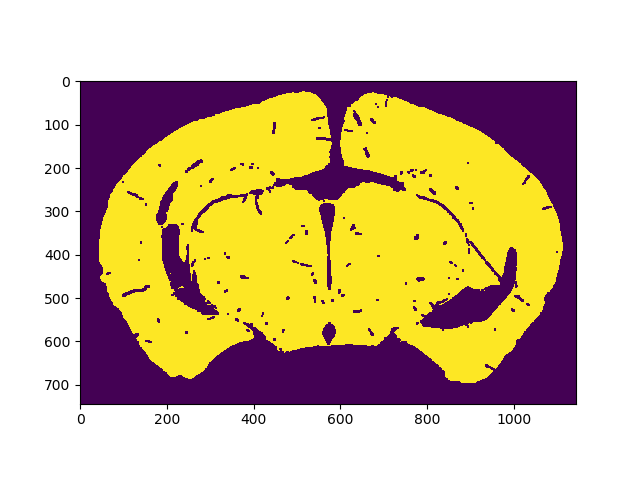

In [66]:

plt.figure()
plt.imshow(mask2[1000,:,:])


In [67]:
tifffile.imsave('mask2.tif',mask2)

In [72]:
print(data.shape, data.dtype)
print(mask.shape, mask.dtype)

viewer = neuroglancer.Viewer()
with viewer.txn() as s:
#  s.voxel_size = (voxel_size, voxel_size, voxel_size)
  s.layers['image'] = neuroglancer.ImageLayer(
    source=neuroglancer.LocalVolume(data=data, volume_type='image'))
  s.layers['segmentation'] = neuroglancer.SegmentationLayer(
    source=neuroglancer.LocalVolume(data=mask, volume_type='segmentation',mesh_options={'max_quadrics_error':-1e-3}), segments=[0])

print(viewer.get_viewer_url())

(1663, 744, 1144) uint8
(1663, 744, 1144) uint64
http://127.0.0.1:43091/v/4ee2e9a92d4378d1e04f6d445c2ec28200f0e4a9/


Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/home/ravescovi/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/ravescovi/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/home/ravescovi/anaconda3/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ravescovi/anaconda3/lib/python3.7/site-packages/tornado/iostream.py", line 713, in _handle_events
    self._handle_write()
  File "/home/ravescovi/anaconda3/lib/python3.7/site-packages/tornado/iostream.py", line 1063, in _handle_write
    self._write_buffer.advance(num_bytes)
  File "/home/ravescovi/anaconda3/lib/python3.7/site-packages/tornado/iostream.py", line 184, in advance
    assert 0 < size <= self._size
AssertionError
Exception in callback None()

In [76]:
del viewer

NameError: name 'viewer' is not defined